In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("All the Required Modules have been Imported")
print("The Tensorflow Version we are using is: "+tf.__version__)

All the Required Modules have been Imported
The Tensorflow Version we are using is: 2.10.0


In [21]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
print("CIFAR10 Dataset has been Loaded")

170498071/170498071 [==============================] - 770s 5us/step
CIFAR10 Dataset has been Loaded


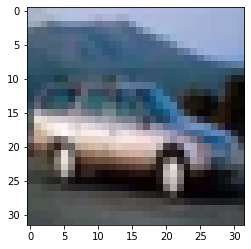

In [22]:
plt.imshow(x_train[4])

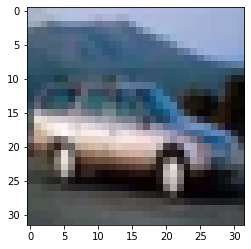

In [23]:
plt.imshow(x_train[4], cmap=plt.cm.binary)

In [24]:
print("Shape of the x_train "+str(x_train.shape)+" Type is: "+str(type(x_train[2])))

Shape of the x_train (50000, 32, 32, 3) Type is: <class 'numpy.ndarray'>


In [25]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

In [26]:
input_shape=(32,32,3)


model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                              input_shape=input_shape,name='input_layer'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',name='conv_1'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),name='pool_1'))
model.add(tf.keras.layers.Dropout(0.25,name='dropout_1')) 

model.add(tf.keras.layers.Flatten(name='flate_1'))

model.add(tf.keras.layers.Dense(128,activation='relu',name='dense_1'))
model.add(tf.keras.layers.Dropout(0.5,name='dropout_2')) 

model.add(tf.keras.layers.Dense(10,activation='softmax',name='output_layer'))
print("Model is now Ready to Use")
print("----------------------------------------------------------------------------------------------------------------------")

model.summary()

Model is now Ready to Use
----------------------------------------------------------------------------------------------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 30, 30, 32)        896       
                                                                 
 conv_1 (Conv2D)             (None, 28, 28, 64)        18496     
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flate_1 (Flatten)           (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 128) 

In [27]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
#Fit the Model
model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
391/391 [==============================] - 7s 13ms/step - loss: 1.6635 - accuracy: 0.3959 - val_loss: 1.3000 - val_accuracy: 0.5343
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 1.3608 - accuracy: 0.5134 - val_loss: 1.1683 - val_accuracy: 0.5931
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 1.2193 - accuracy: 0.5643 - val_loss: 1.0501 - val_accuracy: 0.6370
Epoch 4/5
391/391 [==============================] - 5s 12ms/step - loss: 1.1307 - accuracy: 0.5991 - val_loss: 1.0107 - val_accuracy: 0.6429
Epoch 5/5
391/391 [==============================] - 5s 12ms/step - loss: 1.0732 - accuracy: 0.6209 - val_loss: 0.9674 - val_accuracy: 0.6617


In [28]:
    score=model.evaluate(x_test,y_test)
model.layers[0]._name='conv_0'  # we have changed the name of the layer from input_layer to conv_0
print('Test loss',score[0])
print('Test accuracy',score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.9674 - accuracy: 0.6617
Test loss 0.9673654437065125
Test accuracy 0.6617000102996826


In [50]:
def visualize_conv_layer(layer_name):
  
  layer_output=model.get_layer(layer_name).output  #get the Output of the Layer

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output) #Intermediate model between Input Layer and Output Layer which we are concerned about

  intermediate_prediction=intermediate_model.predict(x_train[4].reshape(1,32,32,3)) #predicting in the Intermediate Node
  
  row_size=4
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
    #---------------We will subplot the Output of the layer which will be the layer_name----------------------------------#
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8)) 

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1 #Increment the Index number of img_index variable
        
print("Function to Visualize the Output has been Created")

Function to Visualize the Output has been Created


In [51]:
print("These are the weights of a Layer")
print("----------------------------------------------------------------------")
model.layers[0].get_weights()

These are the weights of a Layer
----------------------------------------------------------------------


[array([[[[ 5.13446815e-02,  1.76212844e-03,  4.35772873e-02,
            1.44048735e-01, -2.25410927e-02, -2.63336543e-02,
            2.37664022e-02, -8.30073878e-02,  6.69559091e-02,
           -7.80317280e-03, -1.72245502e-01,  1.01161510e-01,
           -4.44134213e-02,  3.34290378e-02, -1.28040060e-01,
           -3.64193581e-02, -1.13547042e-01,  3.81809543e-04,
            3.63642797e-02,  4.00478058e-02,  5.10297120e-02,
           -7.45571479e-02,  1.43726081e-01, -1.40853286e-01,
           -3.74587071e-05,  5.51587716e-02,  8.44329372e-02,
           -9.08768922e-02, -1.41156062e-01,  8.45851526e-02,
            2.58894265e-02, -1.75396636e-01],
          [-9.96883288e-02, -1.02200285e-01,  3.13570350e-02,
           -6.14621351e-03,  8.44458118e-02,  1.55284047e-01,
            7.17512146e-02, -1.79431692e-01, -1.74525529e-01,
            1.31207377e-01, -1.67728573e-01, -1.21234886e-01,
           -6.09034523e-02,  9.15283412e-02, -1.38101801e-01,
           -5.26149459e-

In [52]:
print("These are the weights of a Layer")
print("----------------------------------------------------------------------")
model.layers[1].get_weights()

These are the weights of a Layer
----------------------------------------------------------------------


[array([[[[ 0.05586132,  0.06609543, -0.00223845, ..., -0.06212019,
           -0.12823422, -0.04220952],
          [-0.15529315, -0.01426741,  0.08453192, ..., -0.01038087,
            0.10455602, -0.01505065],
          [ 0.14945365,  0.06077138, -0.04687919, ..., -0.02032261,
           -0.14817204, -0.07461703],
          ...,
          [-0.15686694,  0.01083851, -0.08087426, ...,  0.00169702,
            0.04623855, -0.00236918],
          [-0.05710542,  0.00669149,  0.05813091, ...,  0.12116691,
           -0.04109763,  0.03170655],
          [-0.11423623, -0.02498673, -0.05110819, ..., -0.08830296,
           -0.06430899,  0.01661677]],
 
         [[ 0.07390862, -0.08062398, -0.03663607, ..., -0.02641633,
           -0.05750827, -0.02892343],
          [-0.20248626,  0.08547206, -0.1005944 , ...,  0.02264128,
            0.20673369,  0.12056128],
          [-0.03314733,  0.06898447, -0.07888158, ..., -0.09722041,
           -0.05236716,  0.0129356 ],
          ...,
          [ 0

1/1 [==============================] - 0s 225ms/step
(1, 30, 30, 32)


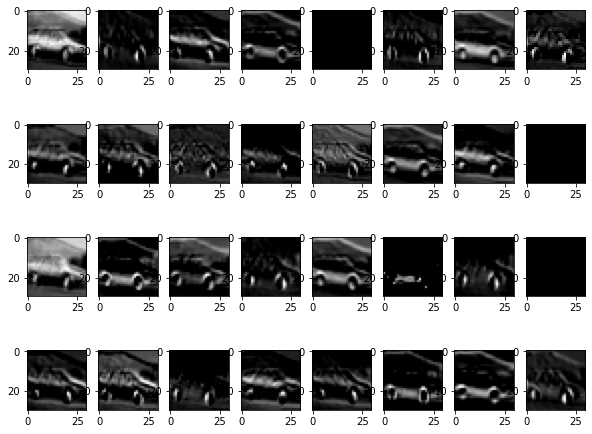

In [53]:
visualize_conv_layer('conv_0')

1/1 [==============================] - 0s 331ms/step
(1, 28, 28, 64)


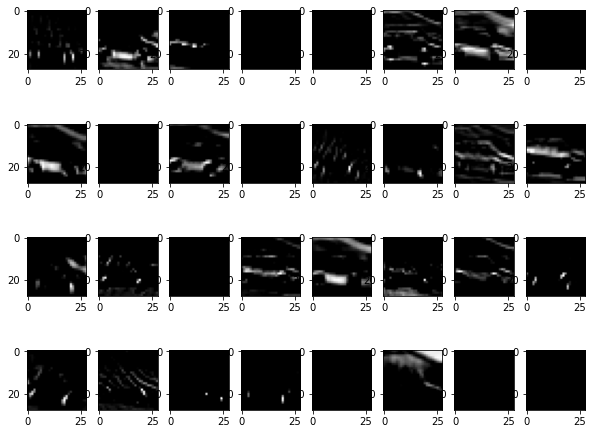

In [54]:
visualize_conv_layer('conv_1')